In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('~/Documents/csvs/all_games.csv')

## Make sure the data was imported correctly

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18800 non-null  int64  
 1   name          18800 non-null  object 
 2   platform      18800 non-null  object 
 3   release_date  18800 non-null  object 
 4   summary       18686 non-null  object 
 5   meta_score    18800 non-null  int64  
 6   user_review   18800 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.0+ MB


In [3]:
df

,Unnamed: 0,name,platform,release_date,summary,meta_score,user_review
0,0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...,...
18795,18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [21]:
# Drop unused column

# df = df.drop(columns="Unnamed: 0")
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [4]:
# Get the mean of the meta score. 

df['meta_score'].mean()

70.6488829787234

In [5]:
# Get the median of the meta score. The value such that one-half of the data lies above and below.

df['meta_score'].median()

72.0

In [6]:
# Get the trimmed mean of the meta score. The average of all values after dropping a fixed 
# number of extreme values.

stats.tmean(df['meta_score'])

70.6488829787234

In [7]:
# Get the trimmed mean of the meta score. This function finds the miminum value of an 
# array a along the specified   axis, but only considering values greater than a specified lower limit.

stats.tmin(df['meta_score'])

20

In [8]:
# Get the trimmed mean of the meta score. This function computes the maximum value 
# of an array along a given axis, while ignoring values larger than a specified upper limit.

stats.tmax(df['meta_score'])

99

In [9]:
# Get the trimmed mean of the meta score. Return mean of array after trimming distribution 
# from both tails.

stats.trim_mean(df['meta_score'], 0.1)

71.58869680851063

In [10]:
# Get the weighted mean

np.average(df['meta_score'], weights=df['meta_score'])

72.76417238681854

In [11]:
# Get the standard deviation

df['meta_score'].std()

12.225006477233462

In [12]:
df['meta_score'].quantile([0.05, .25, .5, .75, .95])

0.05    47.0
0.25    64.0
0.50    72.0
0.75    80.0
0.95    88.0
Name: meta_score, dtype: float64

<AxesSubplot:title={'center':'Metacritic Scores'}, xlabel='meta score', ylabel='amount of games'>

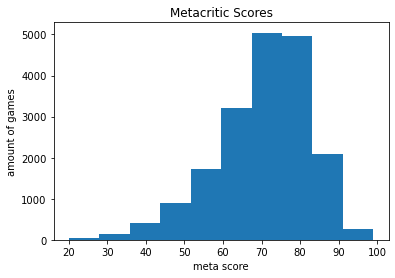

In [13]:
# Plot as a histogram

hist_df = df['meta_score'].plot(kind='hist')
hist_df.set_xlabel('meta score')
hist_df.set_ylabel('amount of games')
hist_df.set_title('Metacritic Scores')
hist_df.set_facecolor('white')
hist_df

In [22]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [23]:
# Check the user_review column for zero

df.loc[df['user_review'] == 0]

,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,0.0
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,0.0
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,0.0
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,0.0
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,0.0
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,0.0
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,0.0
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,0.0
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,0.0


In [24]:
# Get the most used values from "user_review" column
df['user_review'].value_counts()

0.0    1365
7.7     727
7.8     701
7.5     682
7.6     673
       ... 
1.3       2
9.4       1
0.9       1
0.2       1
0.7       1
Name: user_review, Length: 94, dtype: int64

In [26]:
# Get the mean of the user_review. 

df['user_review'].mean()

6.483265957446809

In [27]:
# Get the median of the user_review. 

df['user_review'].median()

7.2

In [28]:
# Get the trimmed mean of the user_review. The average of all values after dropping a fixed 
# number of extreme values.

stats.tmean(df['user_review'])

6.483265957446809

In [29]:
# Get the trimmed mean of the user_review. This function finds the miminum value of an 
# array a along the specified   axis, but only considering values greater than a specified lower limit.

stats.tmin(df['user_review'])

0.0

In [30]:
# Get the trimmed mean of the meta score. This function computes the maximum value 
# of an array along a given axis, while ignoring values larger than a specified upper limit.

stats.tmax(df['user_review'])

9.7

In [31]:
# Get the trimmed mean of the user_review. Return mean of array after trimming distribution 
# from both tails.

stats.trim_mean(df['user_review'], 0.1)

6.925984042553192

In [32]:
# Get the weighted mean

np.average(df['user_review'], weights=df['user_review'])

7.252129623400341

In [33]:
# Get the standard deviation

df['user_review'].std()

2.2327142207746093

In [34]:
# Get the quantile

df['user_review'].quantile([0.05, .25, .5, .75, .95])

0.05    0.0
0.25    6.0
0.50    7.2
0.75    7.9
0.95    8.6
Name: user_review, dtype: float64

<AxesSubplot:ylabel='Frequency'>

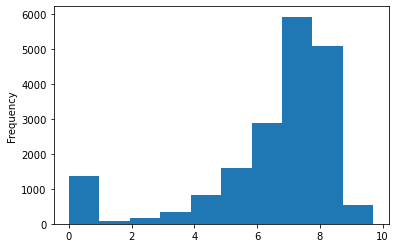

In [35]:
# Plot as a histogram

df['user_review'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

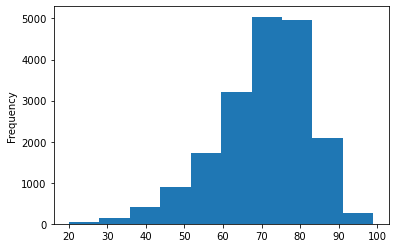

In [36]:
# Plot meta_score

df['meta_score'].plot(kind='hist')